In [16]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.circuit.library import QFT

In [17]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    qft_rotations(circuit, n)


In [18]:
def draper_adder(circuit, n):
    for i in range(n):
        for j in range(i,n):
            circuit.cp(pi/(2**(j-i)), i, j+n)

In [19]:
#Creating a function to change value of a 3 bit number
def value1 (circuit, a, b):
    if a == 1:
        circuit.x(0)
    if b == 1:
        circuit.x(1)

In [65]:
def value2 (circuit, a, b):
    if a == 1:
        circuit.x(2)
    if b == 1:
        circuit.x(3)

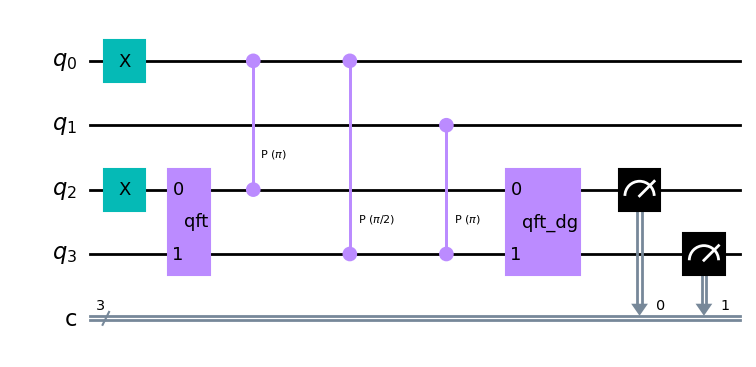

In [89]:
qc=QuantumCircuit(4,3)
value1(qc,1,0)
value2(qc,1,0)
qft=QuantumCircuit(2,name='qft')
qft_rotations(qft,2)
qfti=qft.inverse()
qc.append(qft,[2,3])
draper_adder(qc,2)
qc.append(qfti,[2,3])
qc.measure(2,0)
qc.measure(3,1)
qc.draw('mpl')

ibmqfactory.load_account:WARNING:2023-04-27 23:00:07,465: Credentials are already in use. The existing account in the session will be replaced.


{'000': 2230, '100': 1135, '010': 14702, '110': 1933}


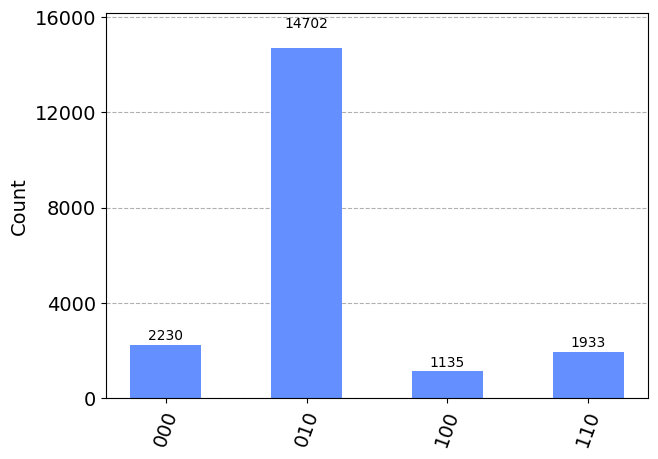

In [94]:
#getting classical output of a quantum circuit
# from qiskit import QuantumCircuit, Aer, execute
# backend = Aer.get_backend('qasm_simulator')
# job = execute(qc, backend, shots=1000)
# result = job.result()
# counts = result.get_counts()
# #reverse output
# counts = {k[::-1]: v for k,v in counts.items()}
# print(counts)
from qiskit import QuantumCircuit, Aer, execute
provider = IBMQ.load_account()
backend = provider.get_backend('ibm_nairobi')
job = execute(qc, backend, shots=20000)
result = job.result()
counts = result.get_counts()
#reverse output
counts = {k[::-1]: v for k,v in counts.items()}
print(counts)
plot_histogram(counts)

{'010': 20000}


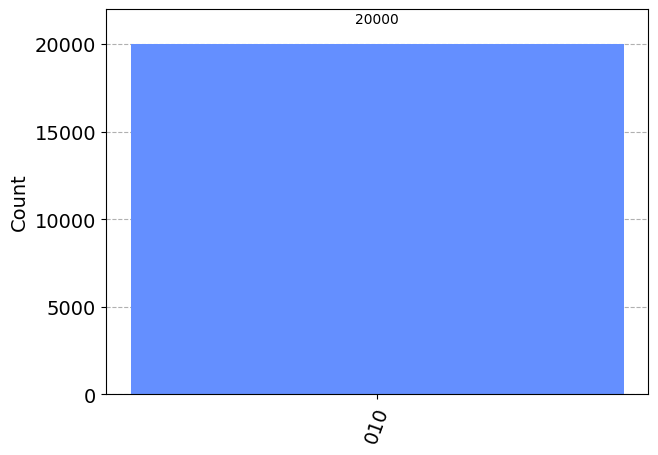

In [95]:
#running on simulator and plotting histogram
from qiskit import QuantumCircuit, Aer, execute
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=20000)
result = job.result()
counts = result.get_counts()
#reverse output
counts = {k[::-1]: v for k,v in counts.items()}
print(counts)
plot_histogram(counts)
